In [2]:
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os

In [2]:
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, xmin

In [3]:
def plot_box(image, bboxes, labels):
    #denormalize
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)
        thickness = max(2, int(w/275))
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=(0,0,255), thickness=thickness)
        return image

In [4]:
def plot(image_paths, label_paths, num_samples=4):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    all_images.sort()
    num_images = len(all_images)
    plt.figure(figsize=(15,12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line [2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w ,h])
                labels.append(label)
            result_image = plot_box(image, bboxes, labels)
            plt.subplot(2, 2, i+1)
            plt.imshow(result_image[:,:,::-1])
            plt.axis('off')
        plt.subplots_adjust(wspace=1)
        plt.tight_layout()
        plt.show()

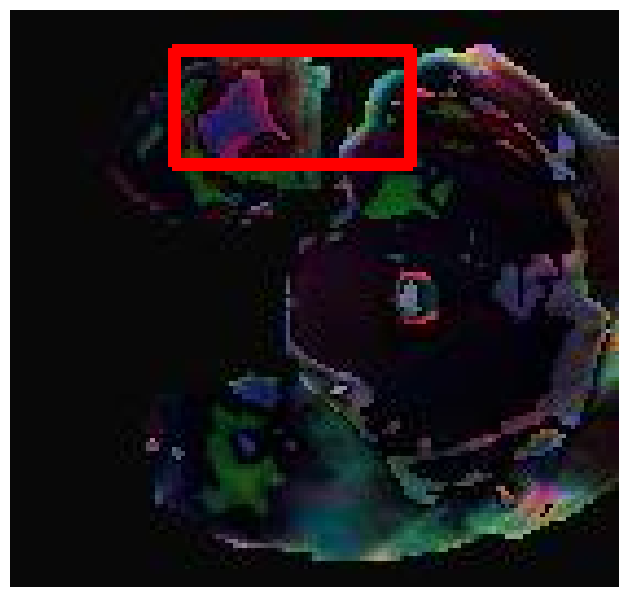

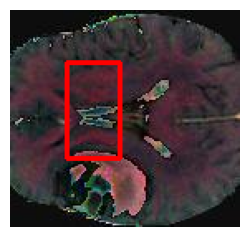

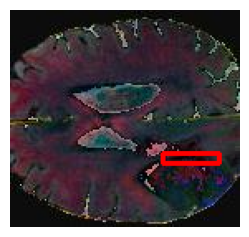

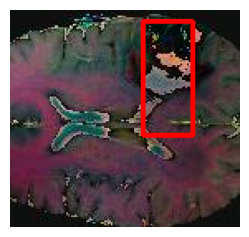

In [5]:
plot(image_paths = 'C:/Users/danid/WorkShop/Brain-Tumor-Detection/train/images',
     label_paths = 'C:/Users/danid/WorkShop/Brain-Tumor-Detection/train/labels',
     num_samples=4
    )

In [6]:
%%writefile tumor_v8.yaml
path: 'C:/Users/danid/WorkShop/Brain-Tumor-Detection'
train: 'train/images'
val: 'valid/images'
test: 'test/images'

#class names
names:
    0: 'type1'
    1: 'type1'
    2: 'type1'

Overwriting tumor_v8.yaml


In [7]:
!pip install ultralytics

In [8]:
EPOCHS = 5
BATCH = 8
IMG_SIZE = 240

In [9]:
from ultralytics import YOLO

In [10]:
model = YOLO('yolov8n.pt')

In [11]:
results = model.train(
    data = 'tumor_v8.yaml',
    imgsz = IMG_SIZE,
    epochs = EPOCHS,
    batch = BATCH,
    name = 'output'
)

Ultralytics YOLOv8.2.2  Python-3.10.13 torch-2.2.2 CPU (12th Gen Intel Core(TM) i7-12700KF)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=tumor_v8.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=240, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=output4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

train: Scanning C:\Users\danid\WorkShop\Brain-Tumor-Detection\train\labels.cache... 6930 images, 79 backgrounds, 0 corrupt: 100%|██████████| 6930/6930 [00:00<?, ?it/s]
val: Scanning C:\Users\danid\WorkShop\Brain-Tumor-Detection\valid\labels.cache... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:00<?, ?it/s]


Plotting labels to runs\detect\output4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs\detect\output4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.885      2.392      1.647          6        256: 100%|██████████| 867/867 [03:15<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:20<00:00,  5.92it/s]


                   all       1980       4380      0.383      0.403      0.348      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.792        1.9      1.585          5        256: 100%|██████████| 867/867 [02:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:19<00:00,  6.33it/s]

                   all       1980       4380      0.501      0.448      0.421      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.731       1.76      1.559          7        256: 100%|██████████| 867/867 [02:52<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:20<00:00,  6.05it/s]

                   all       1980       4380       0.55      0.495      0.479      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.668      1.628      1.511          4        256: 100%|██████████| 867/867 [02:55<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:20<00:00,  6.00it/s]

                   all       1980       4380      0.625      0.484      0.522      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G       1.61      1.519      1.478          4        256: 100%|██████████| 867/867 [03:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:19<00:00,  6.33it/s]

                   all       1980       4380      0.681      0.543      0.585      0.303



5 epochs completed in 0.280 hours.
Optimizer stripped from runs\detect\output4\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\output4\weights\best.pt, 6.2MB

Validating runs\detect\output4\weights\best.pt...
Ultralytics YOLOv8.2.2  Python-3.10.13 torch-2.2.2 CPU (12th Gen Intel Core(TM) i7-12700KF)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:15<00:00,  7.86it/s]


                   all       1980       4380      0.682      0.543      0.585      0.303
                 type1       1980       1246      0.631       0.39      0.454      0.192
                 type2       1980       1944      0.749      0.718      0.754      0.454
                 type3       1980       1190      0.665      0.521      0.546      0.263
Speed: 0.1ms preprocess, 6.4ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\output4
